In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

## Importing cleaned datasets

In [3]:
df_cleaned_compustat = pd.read_csv('data2/Cleaned_Compustat.csv')
df_cleaned_compustat

,cusip,conm,gsector,ggroup,gind,gsubind,fyear,epspx,bkvlps,act,...,pi,txpd,ni,opeps,dv,capx,fopt,fincf,ivncf,ci
0,N6865W,PATHEON NV,35,3520,352030,35203010,2016,0.25,0.9354,1048.700,...,35.200,17.600,138.400,0.46,550.400,146.900,24.252,148.200,-88.300,103.500
1,N6865W,PATHEON NV,35,3520,352030,35203010,2015,-0.26,0.9354,433.534,...,-44.115,13.871,-37.441,0.18,0.000,51.936,24.252,320.066,-312.140,-37.753
2,N6865W,PATHEON NV,35,3520,352030,35203010,2013,-0.82,0.9608,299.820,...,-62.962,2.199,-106.636,-0.32,0.000,53.368,24.252,26.284,-51.869,-116.930
3,N6865W,PATHEON NV,35,3520,352030,35203010,2012,-0.13,2.0276,293.094,...,-8.839,-1.291,-16.686,-0.09,0.000,47.475,24.252,2.682,-47.078,-12.713
4,N6865W,PATHEON NV,35,3520,352030,35203010,2011,-0.03,2.1556,296.689,...,-6.425,9.281,-5.100,-0.02,0.000,49.669,24.252,32.229,-50.995,-0.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,000361,AAR CORP,20,2010,201010,20101010,2014,1.85,25.2654,1116.900,...,105.300,17.300,72.900,1.85,11.800,26.500,26.970,-85.900,-40.900,86.400
13867,000361,AAR CORP,20,2010,201010,20101010,2013,1.38,23.3254,1033.700,...,82.200,24.100,55.000,1.75,12.800,37.600,26.970,-123.700,-32.800,68.200
13868,000361,AAR CORP,20,2010,201010,20101010,2012,1.68,21.4697,1063.272,...,93.509,11.418,67.723,1.68,12.081,91.218,26.970,306.843,-390.225,31.484
13869,000361,AAR CORP,20,2010,201010,20101010,2011,1.85,21.0112,913.985,...,108.503,9.812,69.826,1.87,2.983,124.879,26.970,-11.827,-118.735,80.827


## Data Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cleaned_compustat.iloc[:,7:])
scaled

array([[-0.01748842, -0.04324263, -0.24529338, ...,  0.18737471,
         0.21544401, -0.17764638],
       [-0.01980362, -0.04324263, -0.29681185, ...,  0.24176073,
         0.1480977 , -0.22445456],
       [-0.02234579, -0.04324255, -0.30801003, ...,  0.14879508,
         0.22640494, -0.2506921 ],
       ...,
       [-0.0109968 , -0.04317981, -0.24407301, ...,  0.23757639,
         0.12460441, -0.20151092],
       [-0.01022507, -0.04318121, -0.25657539, ...,  0.13673507,
         0.20628709, -0.18515972],
       [-0.013312  , -0.04318762, -0.26080932, ...,  0.15192345,
         0.17511565, -0.19950012]])

In [10]:
scaled.shape

(13871, 23)

In [14]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=23)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.811036,0.048277,-0.026700,0.134725,-0.018484,-0.052855,0.132626,-0.132060,0.032652,0.043204,...,0.203324,-0.171567,0.099171,0.021395,0.004531,0.037756,-0.018724,-0.063671,0.020645,0.000989
1,-1.104764,0.012038,-0.034143,-0.037198,-0.039539,-0.066775,0.047159,0.045719,0.048030,-0.005073,...,-0.000084,-0.023789,-0.000962,0.018120,0.005093,-0.007282,-0.002029,0.000036,0.008144,-0.000455
2,-1.146907,0.007012,-0.041426,0.039063,-0.032225,0.019835,0.019284,0.034498,0.032386,-0.003961,...,-0.022914,-0.028251,0.007888,0.016782,0.009041,0.005837,-0.003157,0.001200,0.006744,-0.001033
3,-1.130689,-0.022078,-0.040583,0.051725,-0.026000,0.007082,0.000735,0.043087,0.049689,-0.007837,...,-0.014225,-0.025729,-0.002464,0.017300,0.009279,0.008260,-0.005113,0.004240,0.006936,-0.001154
4,-1.125764,-0.026918,-0.040229,0.046768,-0.026292,0.002521,0.005105,0.048289,0.052126,-0.006203,...,-0.012183,-0.024205,0.001866,0.016546,0.008602,0.002367,-0.004514,0.005191,0.007521,-0.001238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,-1.014371,-0.039299,-0.018791,0.071573,-0.023629,0.013268,-0.018619,0.051593,0.031765,-0.047210,...,-0.014397,0.010044,-0.007937,-0.013669,0.003748,0.009997,-0.006175,0.010575,0.006982,-0.002373
13867,-1.015075,-0.030318,-0.020169,0.079548,-0.024419,0.023224,-0.011150,0.050039,0.030085,-0.041969,...,-0.012371,0.004966,-0.012379,-0.014101,0.003107,0.010790,-0.006581,0.007580,0.006656,-0.002632
13868,-1.008499,-0.005774,-0.016464,-0.054170,-0.042042,-0.073333,0.020623,0.051019,0.055124,-0.051840,...,-0.006317,-0.008293,-0.005148,0.000488,0.002005,0.005816,0.006105,0.001969,0.005019,-0.004464
13869,-1.031313,-0.046828,-0.019536,0.032957,-0.028049,-0.000831,-0.017134,0.054460,0.046735,-0.043088,...,-0.023580,-0.009528,0.001418,-0.002288,0.000935,0.005706,-0.005208,-0.000247,0.003282,0.000009


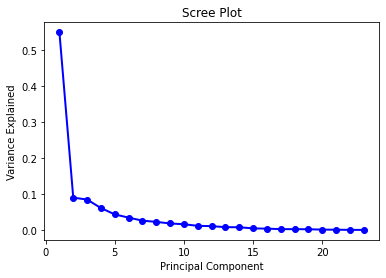

In [23]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [35]:
sorted(pca.explained_variance_ratio_, reverse=True)

[0.5503131738431559,
 0.08992195514379035,
 0.08462682310355893,
 0.06105075826364305,
 0.04328849221116971,
 0.03436184961032639,
 0.025895722620074366,
 0.022482281817647297,
 0.018118126125340157,
 0.015822599552284995,
 0.011503305034175121,
 0.010615735798821808,
 0.007800486716797978,
 0.0075441220364916295,
 0.004418327608460617,
 0.003645967507439869,
 0.0023062196725972188,
 0.002244632196170636,
 0.0019842047226583345,
 0.0009628668317501405,
 0.0006810126767946462,
 0.0002896338508778881,
 0.00012170305597282311]